In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("genome_zeeshan_usmani.csv")

/opt/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
reads=np.array(df['genotype'])

In [4]:
def overlap(a, b, min_length=3):
    """ Return length of longest suffix of 'a' matching
        a prefix of 'b' that is at least 'min_length'
        characters long.  If no such overlap exists,
        return 0. """
    start = 0  # start all the way at the left
    while True:
        start = a.find(b[:min_length], start)  # look for b's prefix in a
        if start == -1:  # no more occurrences to right
            return 0
        # found occurrence; check for full suffix/prefix match
        if b.startswith(a[start:]):
            return len(a)-start
        start += 1  # move just past previous match



In [5]:
import itertools

In [6]:
def pick_maximal_overlap(reads, k):
    """ Return a pair of reads from the list with a
        maximal suffix/prefix overlap >= k.  Returns
        overlap length 0 if there are no such overlaps."""
    reada, readb = None, None
    best_olen = 0
    for a, b in itertools.permutations(reads, 2):
        olen = overlap(a, b, min_length=k)
        if olen > best_olen:
            reada, readb = a, b
            best_olen = olen
    return reada, readb, best_olen

In [7]:
def greedy_scs(reads, k):
    """ Greedy shortest-common-superstring merge.
        Repeat until no edges (overlaps of length >= k)
        remain. """
    read_a, read_b, olen = pick_maximal_overlap(reads, k)
    while olen > 0:
        reads.remove(read_a)
        reads.remove(read_b)
        reads.append(read_a + read_b[olen:])
        read_a, read_b, olen = pick_maximal_overlap(reads, k)
    return ''.join(reads)

In [31]:
#genome = greedy_scs(reads,2)

#Testing for a shorter fragment

genome='ACTTAGACCGGTTATACCCACAATATACCAATTTGGCCCTTAAAAGGTTAGGATACATAGGATACATAGGATACATAGATTACATAGATTACATAGGGACATTAGGAAAATACCAGGATATATACAGTAACGTACATGACAGATCAGTAGCATGGATC'

In [32]:
def de_bruijn_ize(st, k):
    """ Return a list holding, for each k-mer, its left
        k-1-mer and its right k-1-mer in a pair """
    edges = []
    nodes = set()
    for i in range(len(st) - k + 1):
        edges.append((st[i:i+k-1], st[i+1:i+k]))
        nodes.add(st[i:i+k-1])
        nodes.add(st[i+1:i+k])
    return nodes, edges

In [33]:
nodes, edges = de_bruijn_ize(genome, 8)

In [34]:
lines=np.array(list(nodes))

In [35]:
import scipy.io

from numpy import argmax

X=[]

for i in range(0,len(lines)):
    
    data=lines[i]
    alphabet = 'ARNDCQEGHILKMFPSTWYVX'
# define a mapping of chars to integers
    char_to_int = dict((c, i) for i, c in enumerate(alphabet))
    int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# integer encode input data
    integer_encoded = [char_to_int[char] for char in data]
    X.append(integer_encoded)

X=np.array(X)

In [36]:
from sklearn.cluster import KMeans

In [37]:
#PCA for Kmeans
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

In [42]:
#Kmeans
kmeans = KMeans(n_clusters=30, random_state=0).fit(principalComponents)

y_kmeans=kmeans.predict(principalComponents)

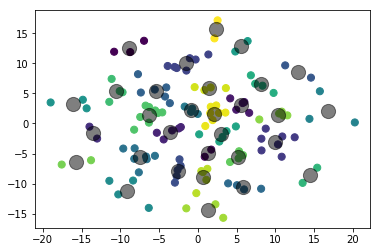

In [43]:
import matplotlib.pyplot as plt
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

In [48]:
#Nearest neighbors

from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(principalComponents)

In [49]:
distances, indices = nbrs.kneighbors(principalComponents)

In [50]:
indices

array([[  0,  92, 120],
       [  1,  43,  41],
       [  2, 112,  29],
       [  3,  65, 106],
       [  4,  11,  66],
       [  5,  12,  26],
       [  6,  86,  75],
       [  7, 119,  68],
       [  8,  63, 114],
       [  9,  14, 117],
       [ 10,  65,   3],
       [ 11,  66,   4],
       [ 12,  26,   5],
       [ 13,  84,  19],
       [ 14,   9, 117],
       [ 15,  22,  94],
       [ 16,  52, 100],
       [ 17,  31,  67],
       [ 18,  57,  55],
       [ 19,  84,  51],
       [ 20, 104,  24],
       [ 21, 115, 102],
       [ 22,  15,  94],
       [ 23,  91,  71],
       [ 24,  20,  62],
       [ 25, 108,   3],
       [ 26,  12,  74],
       [ 27,  64, 122],
       [ 28, 100,  36],
       [ 29, 112,   2],
       [ 30, 116,  93],
       [ 31,  17,  87],
       [ 32,  81,   8],
       [ 33, 123,  70],
       [ 34,  37,  83],
       [ 35, 109,  42],
       [ 36,  28, 100],
       [ 37,  34,  83],
       [ 38, 112,  29],
       [ 39, 119,  50],
       [ 40,  63,   8],
       [ 41,  43

In [52]:
kmeans.labels_[117]

24